# Customer Churn Prediction using Machine Learning
## 📂 Dataset: **[Telco Customer Churn Dataset (Kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)**
---

## Objective
Telecom companies face major losses when customers discontinue their service (i.e., churn).

In this project, we will **analyze customer data** to predict whether a customer will churn and evaluate the performance of multiple classification models.

We will apply and compare the following **supervised learning algorithms**:
1. Logistic Regression  
2. K-Nearest Neighbors (KNN)  
3. Decision Tree  
4. Random Forest Classifier  

We will also explore **evaluation metrics** such as:
- Confusion Matrix  
- Precision  
- Recall  
- F1 Score  
- ROC-AUC  

to assess model performance.

---

##  Part 1: Data Understanding and Preparation

### Load the Dataset
- Load the **Telco Customer Churn** dataset into the notebook.

### Explore the Dataset
- Check for missing values and data types.  
- Summarize key statistics and visualize important relationships.  
- Explore the **churn distribution** (target balance).

### Clean and Preprocess the Data
- Handle missing or blank values (e.g., in **TotalCharges**).  
- Encode categorical features appropriately (e.g., Label Encoding, One-Hot Encoding).  
- Scale numerical features if required (especially for KNN).

---

In [99]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [100]:
# Load dataset (update path if needed)
df = pd.read_csv('Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display first few rows
print("First 5 Rows:")
print(df.head(), "\n")

# Dataset overview
print("Dataset Info:")
print(df.info(), "\n")

print("Shape of Dataset:", df.shape, "\n")


First 5 Rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies       

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64 

Blank String Counts:
TotalCharges    11
dtype: int64 

Statistical Summary:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.0000

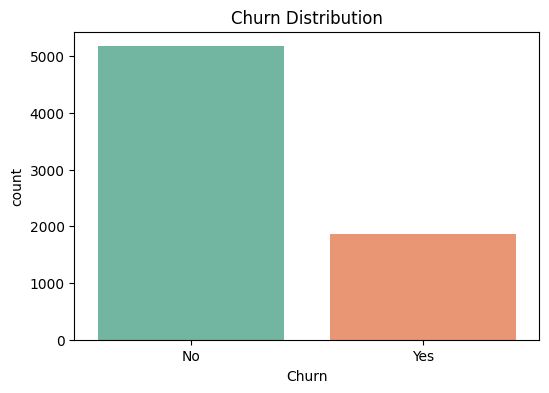


Churn Value Counts:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [71]:
# Explore the Dataset
# Check missing values
print("Missing Values:")
print(df.isnull().sum(), "\n")

# Identify columns with blank strings (which may represent missing values)
blank_counts = (df == ' ').sum()
print("Blank String Counts:")
print(blank_counts[blank_counts > 0], "\n")

# Summary statistics for numeric columns
print("Statistical Summary:")
print(df.describe(), "\n")

# Unique values in categorical features (for overview)
print("Unique Value Counts:")
for col in df.select_dtypes('object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2', legend=False)
plt.title('Churn Distribution')
plt.show()

print("\nChurn Value Counts:")
print(df['Churn'].value_counts(normalize=True) * 100)


 Missing TotalCharges: 11

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] 

Final Dataset Shape: (7043, 31)
Columns Preview: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service']


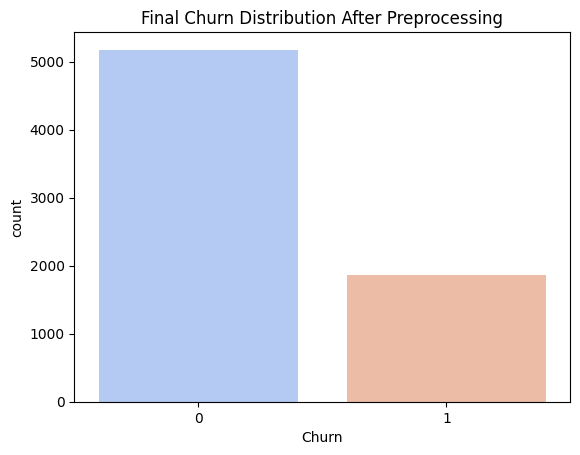


 Data preparation complete!


In [72]:
# Clean and Preprocess the Data

# Handle blank TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
print("\n Missing TotalCharges:", df['TotalCharges'].isna().sum())

df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)

# Drop useless column
df.drop('customerID', axis=1, inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", list(cat_cols))
print("Numerical Columns:", list(num_cols), "\n")

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale Numerical Features

scaler = StandardScaler()
scaled_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])

# Final Overview
print("Final Dataset Shape:", df_encoded.shape)
print("Columns Preview:", df_encoded.columns[:10].tolist())

sns.countplot(x='Churn', data=df_encoded, hue='Churn', palette='coolwarm', legend=False)
plt.title('Final Churn Distribution After Preprocessing')
plt.show()

print("\n Data preparation complete!")

## Model Implementation

### A. Logistic Regression
---
**Concept**:
Logistic Regression is a *classification* algorithm that models the probability of a binary outcome.
It uses the **Sigmoid (logistic) function** to map predictions between 0 and 1.

The Sigmoid function:
       σ(z) = 1 / (1 + e^(-z))

 - If σ(z) > 0.5 → class = 1 (e.g., customer churns)
 - If σ(z) ≤ 0.5 → class = 0 (e.g., customer stays)

 The model fits a linear combination of features (z = w₀ + w₁x₁ + w₂x₂ + ... + wn*xn) and applies the sigmoid to estimate the probability of belonging to the positive class.

---


In [73]:
#Import Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Logistic Regression Model Performance:
Accuracy       : 0.8041
Precision      : 0.6541
Recall         : 0.5561
F1 Score       : 0.6012
ROC-AUC Score  : 0.8424


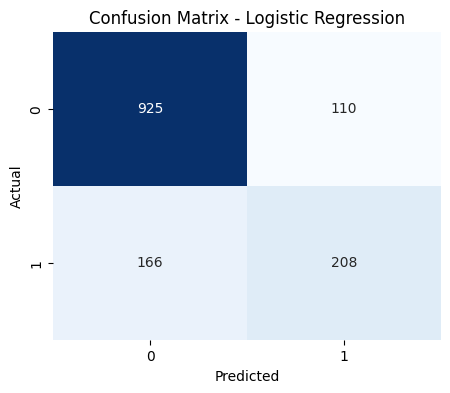

In [75]:
# Train Logistic Regression Model

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


# Model Evaluation

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression Model Performance:")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC-AUC Score  : {roc:.4f}")


# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



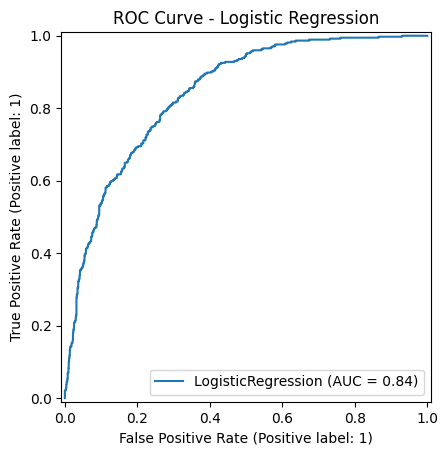

In [76]:
# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title('ROC Curve - Logistic Regression')
plt.show()

### B. K-Nearest Neighbors (KNN)

   KNN is a **non-parametric**, instance-based learning algorithm.
   It does not build an explicit model. Instead, it classifies a new data point
   based on the **majority class of its K nearest neighbors** in the training set.

  - Explanation:
    - Computes the **distance** (usually Euclidean) between the new point and all training points.
    - Selects the K closest neighbors.
    - Predicts the majority class among those neighbors.

  - Distance-Based Prediction:
    - If most nearby customers with similar attributes churned,
       the new customer is also likely to churn.
    - If most nearby customers did not churn, it predicts "no churn".

  - Importance of Scaling:
    - KNN is sensitive to the scale of numerical features since it relies on distances.
    - Therefore, **StandardScaler** or **MinMaxScaler** must be applied beforehand.

  - Effect of K:
    - Small K means more variance, may overfit.
    - Large K means smoother boundaries, may underfit.
---


### K-Nearest Neighbors (KNN):

   KNN is a **non-parametric**, instance-based learning algorithm.
   It does not build an explicit model. Instead, it classifies a new data point
   based on the **majority class of its K nearest neighbors** in the training set.

  - Explanation:
    - Compute the **distance** (usually Euclidean) between the new point and all training points.
    - Select the K closest neighbors.
    - Predict the majority class among those neighbors.

  - Distance-Based Prediction:
    - If most nearby customers with similar attributes churned,
       the new customer is also likely to churn.
    - If most nearby customers did not churn, it predicts "no churn".

  - Importance of Scaling:
    - KNN is sensitive to the scale of numerical features since it relies on distances.
    - Therefore, **StandardScaler** or **MinMaxScaler** must be applied beforehand.

  - Effect of K:
    - Small K means more variance, may overfit.
    - Large K means smoother boundaries, may underfit.
---

In [77]:
# Import Library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [78]:
# Scaling numerical features
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Test multiple K values

k_values = [3, 5, 7, 9]
knn_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    knn_results.append({
        'K': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

# Results DataFrame
knn_results_df = pd.DataFrame(knn_results)
print("KNN Performance Comparison:")
display(knn_results_df)

# Identify best K
best_k = knn_results_df.loc[knn_results_df['ROC-AUC'].idxmax(), 'K']
print(f"Best K based on ROC-AUC: {best_k}")

# Train KNN with best K
knn_best = KNeighborsClassifier(n_neighbors=int(best_k))
knn_best.fit(X_train_scaled, y_train)

y_pred_knn = knn_best.predict(X_test_scaled)
y_pred_prob_knn = knn_best.predict_proba(X_test_scaled)[:, 1]

KNN Performance Comparison:


,K,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,3,0.743790,0.517711,0.508021,0.512821,0.735002
1,5,0.747339,0.525281,0.500000,0.512329,0.771797
2,7,0.760114,0.551136,0.518717,0.534435,0.783929
3,9,0.770050,0.569444,0.548128,0.558583,0.799145


Best K based on ROC-AUC: 9


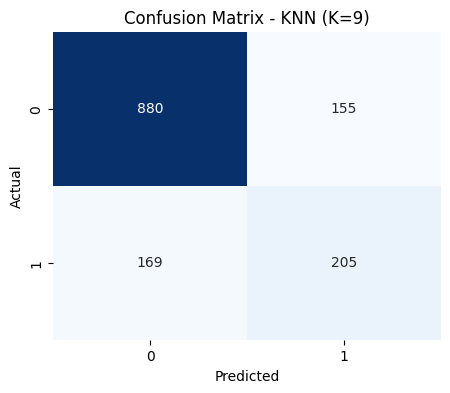

In [79]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - KNN (K={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

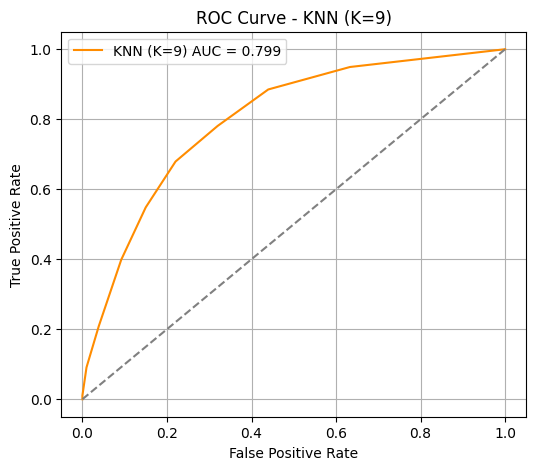

In [80]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc = roc_auc_score(y_test, y_pred_prob_knn)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'KNN (K={best_k}) AUC = {roc_auc:.3f}', color='darkorange')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - KNN (K={best_k})')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# Discussion: Impact of Scaling and Choice of K

# Compare KNN with and without scaling
knn_unscaled_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # raw (unscaled) features

    y_pred = knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)[:, 1]

    roc_auc = roc_auc_score(y_test, y_pred_prob)
    knn_unscaled_results.append({'K': k, 'ROC-AUC': roc_auc})

unscaled_df = pd.DataFrame(knn_unscaled_results)
scaled_df = knn_results_df[['K', 'ROC-AUC']].rename(columns={'ROC-AUC': 'ROC-AUC (Scaled)'})
comparison_df = pd.merge(unscaled_df, scaled_df, on='K')
comparison_df['Improvement'] = comparison_df['ROC-AUC (Scaled)'] - comparison_df['ROC-AUC']

display(comparison_df)

# Automated Discussion
best_k_scaled = comparison_df.loc[comparison_df['ROC-AUC (Scaled)'].idxmax(), 'K']
improvement_value = comparison_df.loc[comparison_df['K'] == best_k_scaled, 'Improvement'].values[0]

print("Discussion:")
if improvement_value > 0:
    print(f"- Scaling improved performance: ROC-AUC increased by {improvement_value:.4f} for K={best_k_scaled}.")
else:
    print(f"- Scaling did not improve performance for K={best_k_scaled}.")

print(f"- Choice of K impacts model performance significantly:")
for idx, row in comparison_df.iterrows():
    print(f"  - K={int(row['K'])}: ROC-AUC unscaled={row['ROC-AUC']:.3f}, scaled={row['ROC-AUC (Scaled)']:.3f}")

print(f"- Smaller K (e.g., 3) may overfit, larger K (e.g., 9) may underfit. Optimal K={best_k_scaled}.")


,K,ROC-AUC,ROC-AUC (Scaled),Improvement
0,3,0.750605,0.735002,-0.015602
1,5,0.793433,0.771797,-0.021636
2,7,0.803108,0.783929,-0.019179
3,9,0.808346,0.799145,-0.009201


Discussion:
- Scaling did not improve performance for K=9.
- Choice of K impacts model performance significantly:
  - K=3: ROC-AUC unscaled=0.751, scaled=0.735
  - K=5: ROC-AUC unscaled=0.793, scaled=0.772
  - K=7: ROC-AUC unscaled=0.803, scaled=0.784
  - K=9: ROC-AUC unscaled=0.808, scaled=0.799
- Smaller K (e.g., 3) may overfit, larger K (e.g., 9) may underfit. Optimal K=9.



### C. Decision Tree


  **Concept**:
 A Decision Tree splits the data into smaller and smaller subsets
 based on feature thresholds (e.g., "Is Age > 40?").
 Each internal node represents a condition, and each leaf node represents a class label.
 The model recursively selects the best feature and threshold to minimize impurity
 (usually measured using Gini Index or Entropy).

  How it works:
 - The algorithm checks all possible splits.
 - Chooses the one that best separates the classes.
 - Repeats recursively to grow a tree.
 However, if allowed to grow fully, it may overfit — perfectly learning training data
 but performing poorly on unseen data.

  Regularization Parameters:
 - **max_depth**: Limits how deep the tree can grow.
 - **min_samples_leaf**: Ensures each leaf has at least a minimum number of samples.
   Both help to simplify the model and prevent overfitting.

---


In [82]:
#Import Library
from sklearn.tree import DecisionTreeClassifier

In [83]:
# Hyperparameter Tuning

# Define hyperparameters to test
max_depth_values = [3, 5, 7, 9, None]
min_samples_leaf_values = [1, 3, 5, 10]

dt_results = []

# Use scaled features for consistency
for depth in max_depth_values:
    for leaf in min_samples_leaf_values:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=42)
        dt.fit(X_train_scaled, y_train)

        y_pred = dt.predict(X_test_scaled)
        y_pred_prob = dt.predict_proba(X_test_scaled)[:, 1]

        dt_results.append({
            'max_depth': depth,
            'min_samples_leaf': leaf,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1': f1_score(y_test, y_pred),
            'ROC_AUC': roc_auc_score(y_test, y_pred_prob)
        })

# Convert to DataFrame
dt_results_df = pd.DataFrame(dt_results)
display(dt_results_df.sort_values(by='ROC_AUC', ascending=False))


# Train best Decision Tree
best_dt_row = dt_results_df.loc[dt_results_df['ROC_AUC'].idxmax()]
best_depth_val = best_dt_row['max_depth']
best_leaf_val = best_dt_row['min_samples_leaf']

# Cast to int if needed
best_depth_val = int(best_depth_val) if best_depth_val is not None else None
best_leaf_val = int(best_leaf_val)

dt_best = DecisionTreeClassifier(max_depth=best_depth_val, min_samples_leaf=best_leaf_val, random_state=42)
dt_best.fit(X_train_scaled, y_train)

y_pred_dt = dt_best.predict(X_test_scaled)
y_pred_prob_dt = dt_best.predict_proba(X_test_scaled)[:, 1]

,max_depth,min_samples_leaf,Accuracy,Precision,Recall,F1,ROC_AUC
6,5.0,5,0.794180,0.629630,0.545455,0.584527,0.828841
5,5.0,3,0.794180,0.629630,0.545455,0.584527,0.828841
7,5.0,10,0.795600,0.631902,0.550802,0.588571,0.828694
4,5.0,1,0.794180,0.629630,0.545455,0.584527,0.828358
11,7.0,10,0.799148,0.645367,0.540107,0.588064,0.820773
9,7.0,3,0.794180,0.629630,0.545455,0.584527,0.817416
1,3.0,3,0.787083,0.668182,0.393048,0.494949,0.816766
0,3.0,1,0.787083,0.668182,0.393048,0.494949,0.816766
3,3.0,10,0.787083,0.668182,0.393048,0.494949,0.816766
2,3.0,5,0.787083,0.668182,0.393048,0.494949,0.816766


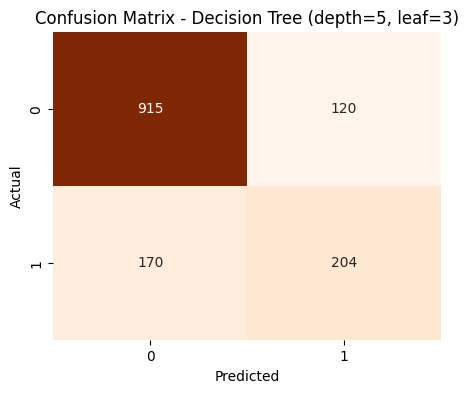

In [84]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title(f'Confusion Matrix - Decision Tree (depth={best_depth_val}, leaf={best_leaf_val})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

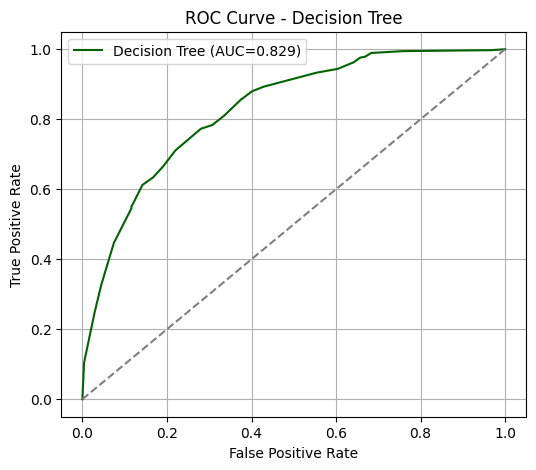

In [85]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc = roc_auc_score(y_test, y_pred_prob_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC={roc_auc:.3f})', color='darkgreen')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Automated Discussion
print("Discussion:")
print(f"- Optimal max_depth: {best_depth_val}, min_samples_leaf: {best_leaf_val}")
print("- max_depth limits tree height; prevents overfitting to noise if too high.")
print("- min_samples_leaf ensures leaves have enough samples; avoids overfitting small subsets.")
print(f"- Best ROC-AUC achieved: {roc_auc:.4f}")

Discussion:
- Optimal max_depth: 5, min_samples_leaf: 3
- max_depth limits tree height; prevents overfitting to noise if too high.
- min_samples_leaf ensures leaves have enough samples; avoids overfitting small subsets.
- Best ROC-AUC achieved: 0.8288



# **D. Random Forest Classifier**


   Random Forest is an **ensemble learning** method, specifically a bagging (bootstrap aggregating) approach.
   Instead of building a single Decision Tree, it builds **multiple trees** on random subsets of data and features.
   The final prediction is made by **majority vote** (classification) or average (regression).

   Advantages:
   - Reduces overfitting compared to a single Decision Tree.
   - Handles high-dimensional data well.
   - Provides feature importance scores.

   Bagging:
   - Randomly sample the dataset with replacement (bootstrap samples).
   - Train a tree on each sample.
   - Combine predictions from all trees to reduce variance.
---


In [87]:
# Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [88]:
# Random Forest Classifier

# Hyperparameter Tuning
n_estimators_values = [50, 100, 200]
max_depth_values = [None, 5, 7, 9]
max_features_values = ['sqrt', 'log2', None]

rf_results = []

for n_est in n_estimators_values:
    for depth in max_depth_values:
        for feat in max_features_values:
            rf = RandomForestClassifier(
                n_estimators=n_est,
                max_depth=depth,
                max_features=feat,
                random_state=42
            )
            rf.fit(X_train_scaled, y_train)

            y_pred = rf.predict(X_test_scaled)
            y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]

            rf_results.append({
                'n_estimators': n_est,
                'max_depth': depth,
                'max_features': feat,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1': f1_score(y_test, y_pred),
                'ROC_AUC': roc_auc_score(y_test, y_pred_prob)
            })

# Convert to DataFrame and display best
rf_results_df = pd.DataFrame(rf_results)
display(rf_results_df.sort_values(by='ROC_AUC', ascending=False))


# Train Random Forest
best_rf_row = rf_results_df.loc[rf_results_df['ROC_AUC'].idxmax()]
best_n_estim = int(best_rf_row['n_estimators'])
best_depth_val = int(best_rf_row['max_depth']) if best_rf_row['max_depth'] is not None else None
best_max_feat = best_rf_row['max_features']

rf_best = RandomForestClassifier(
    n_estimators=best_n_estim,
    max_depth=best_depth_val,
    max_features=best_max_feat,
    random_state=42
)
rf_best.fit(X_train_scaled, y_train)

y_pred_rf = rf_best.predict(X_test_scaled)
y_pred_prob_rf = rf_best.predict_proba(X_test_scaled)[:, 1]

,n_estimators,max_depth,max_features,Accuracy,Precision,Recall,F1,ROC_AUC
29,200,5.0,None,0.800568,0.667870,0.494652,0.568356,0.844630
5,50,5.0,None,0.801278,0.670290,0.494652,0.569231,0.844602
17,100,5.0,None,0.797729,0.661818,0.486631,0.560863,0.844341
32,200,7.0,None,0.803407,0.664407,0.524064,0.585949,0.844284
8,50,7.0,None,0.799858,0.659722,0.508021,0.574018,0.844176
20,100,7.0,None,0.805536,0.674825,0.516043,0.584848,0.844043
30,200,7.0,sqrt,0.799148,0.673004,0.473262,0.555730,0.843615
34,200,9.0,log2,0.805536,0.677305,0.510695,0.582317,0.842675
18,100,7.0,sqrt,0.797729,0.667925,0.473262,0.553991,0.842458
6,50,7.0,sqrt,0.799148,0.675676,0.467914,0.552923,0.841812


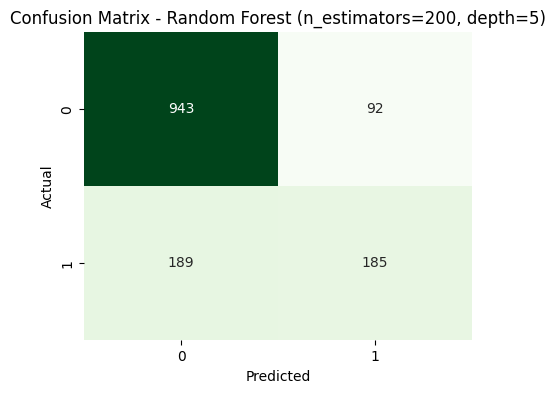

In [89]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title(f'Confusion Matrix - Random Forest (n_estimators={best_n_estim}, depth={best_depth_val})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

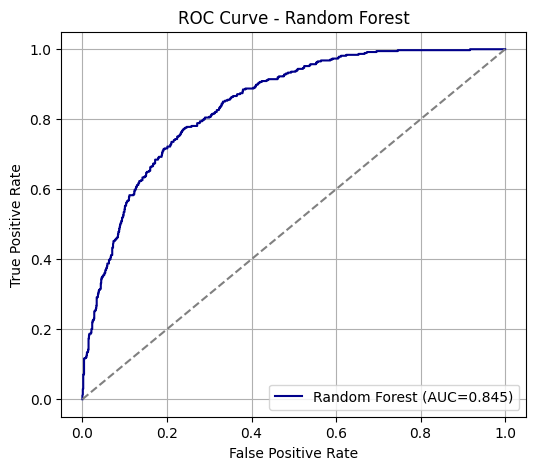

In [90]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC={roc_auc:.3f})', color='darkblue')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

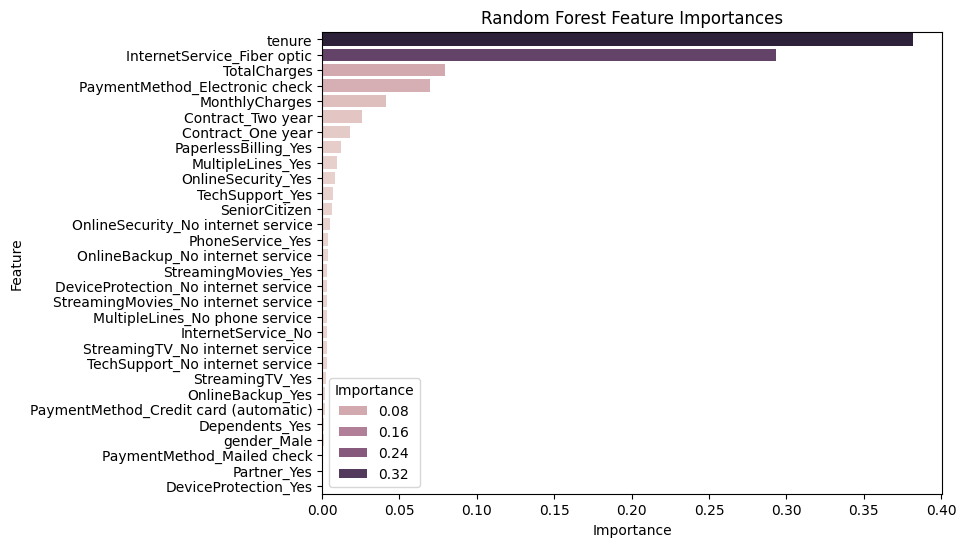

In [91]:
# Feature Importance
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

importances = rf_best.feature_importances_
feature_names = X_train_scaled_df.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, hue='Importance', dodge=False)
plt.title('Random Forest Feature Importances')
plt.show()

In [92]:
# Discussion
print(" Discussion:")
print(f"- Best n_estimators: {best_n_estim}, max_depth: {best_depth_val}, max_features: {best_max_feat}")
print("- Random Forest reduces overfitting by averaging multiple decision trees (bagging).")
print("- Feature importance shows which features contribute most to predictions.")
print(f"- Best ROC-AUC achieved: {roc_auc:.4f}")

 Discussion:
- Best n_estimators: 200, max_depth: 5, max_features: None
- Random Forest reduces overfitting by averaging multiple decision trees (bagging).
- Feature importance shows which features contribute most to predictions.
- Best ROC-AUC achieved: 0.8446



## **Part 3: Model Evaluation**

1. For each model, we will now compute and interpret:

   - **Confusion Matrix**
   - **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, **False Negatives (FN)**
   - **Precision, Recall, F1 Score, and Accuracy**

2. Plot and interpret the **ROC curve** and compute the **ROC-AUC score** for each model.  

3. Compare all models using a **performance summary table**.  
---


In [93]:
# Import Library
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

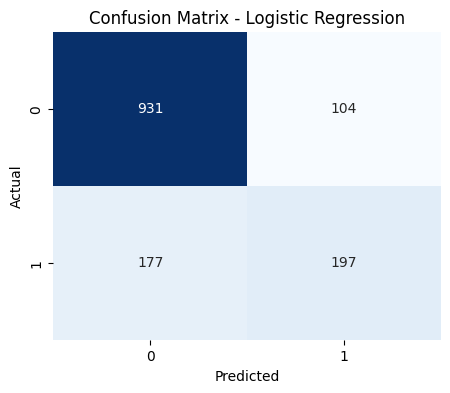

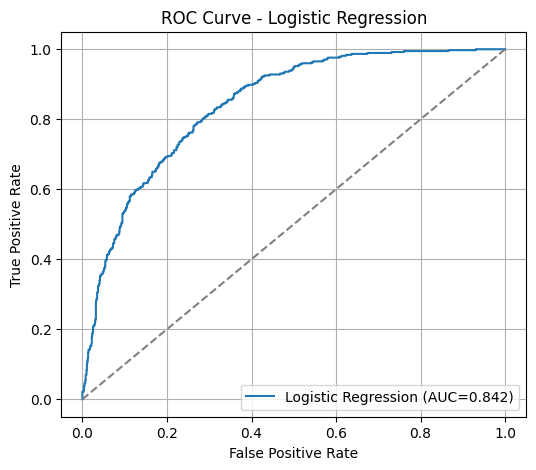

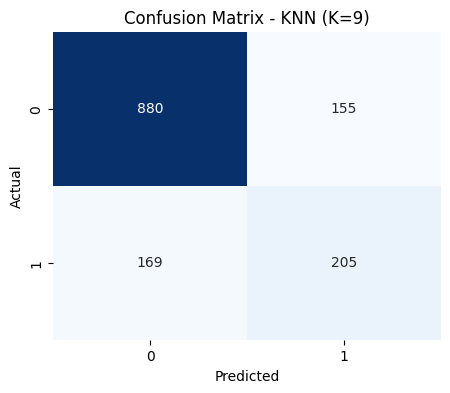

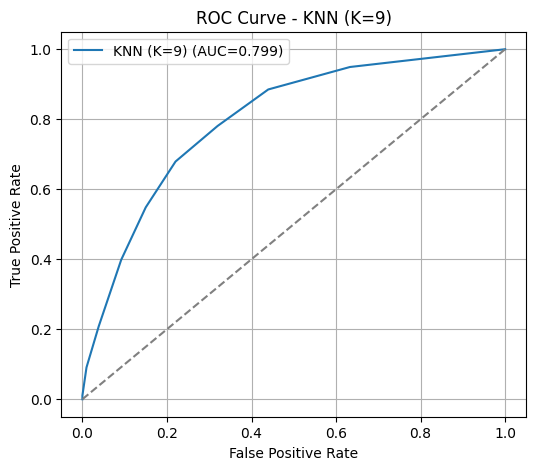

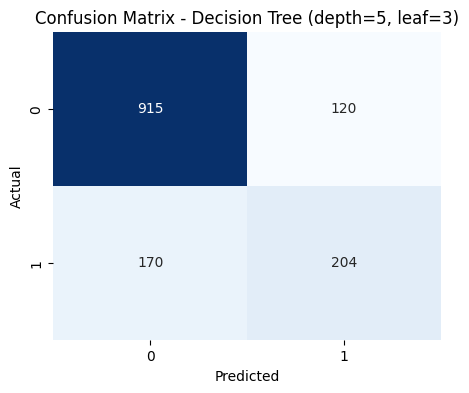

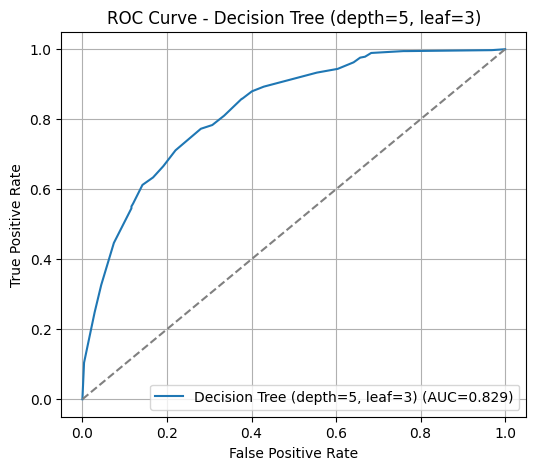

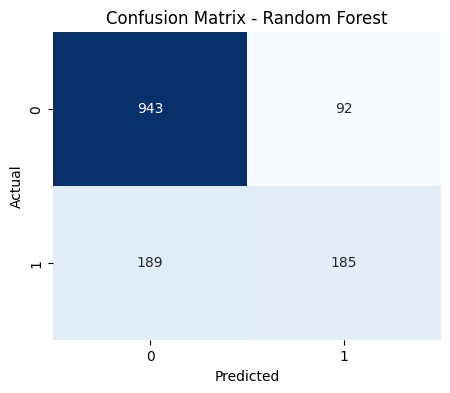

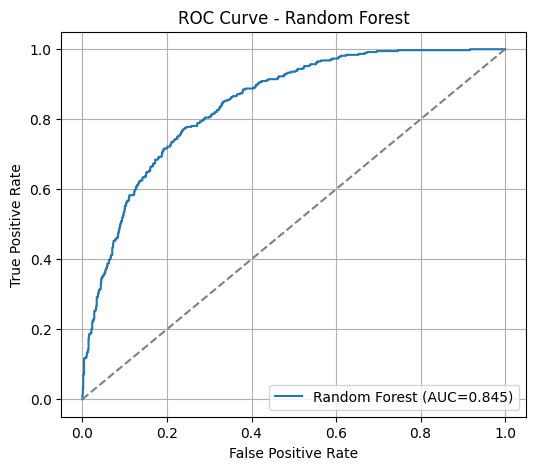

In [94]:
# Model Evaluation

# Prepare model predictions

model_predictions = {
    "Logistic Regression": (y_pred, y_pred_proba),
    f"KNN (K={best_k_scaled})": (y_pred_knn, y_pred_prob_knn),
    f"Decision Tree (depth={best_depth_val}, leaf={best_leaf_val})": (y_pred_dt, y_pred_prob_dt),
    "Random Forest": (y_pred_rf, y_pred_prob_rf)
}


# Initialize performance table

performance_list = []


# Compute metrics & plot confusion matrices

for model_name, (y_pred_model, y_pred_prob_model) in model_predictions.items():
    acc = accuracy_score(y_test, y_pred_model)
    prec = precision_score(y_test, y_pred_model)
    rec = recall_score(y_test, y_pred_model)
    f1 = f1_score(y_test, y_pred_model)
    roc_auc = roc_auc_score(y_test, y_pred_prob_model)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_model)
    tn, fp, fn, tp = cm.ravel()

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob_model)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc:.3f})')
    plt.plot([0,1],[0,1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Append metrics
    performance_list.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC_AUC': roc_auc,
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn
    })



In [95]:
# Performance Summary Table
performance_df = pd.DataFrame(performance_list)
display(performance_df.sort_values(by='ROC_AUC', ascending=False))

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,TP,FP,TN,FN
3,Random Forest,0.800568,0.667870,0.494652,0.568356,0.844630,185,92,943,189
0,Logistic Regression,0.800568,0.654485,0.526738,0.583704,0.842396,197,104,931,177
2,"Decision Tree (depth=5, leaf=3)",0.794180,0.629630,0.545455,0.584527,0.828841,204,120,915,170
1,KNN (K=9),0.770050,0.569444,0.548128,0.558583,0.799145,205,155,880,169


In [96]:
#  Discussion

best_model = performance_df.loc[performance_df['ROC_AUC'].idxmax()]
print("Discussion:")
print(f"- Best overall model: {best_model['Model']} with ROC-AUC: {best_model['ROC_AUC']:.4f}")
print("- For churn prediction, recall is usually more important than precision because missing a churner (FN) can be costly.")
print("- Logistic Regression & Decision Tree: more interpretable.")
print("- Random Forest: highest performance, less interpretable than a single tree, but reduces overfitting.")
print("- KNN: sensitive to scaling and K choice; moderate performance.")


Discussion:
- Best overall model: Random Forest with ROC-AUC: 0.8446
- For churn prediction, recall is usually more important than precision because missing a churner (FN) can be costly.
- Logistic Regression & Decision Tree: more interpretable.
- Random Forest: highest performance, less interpretable than a single tree, but reduces overfitting.
- KNN: sensitive to scaling and K choice; moderate performance.


# Part 4: Insights and Conclusion


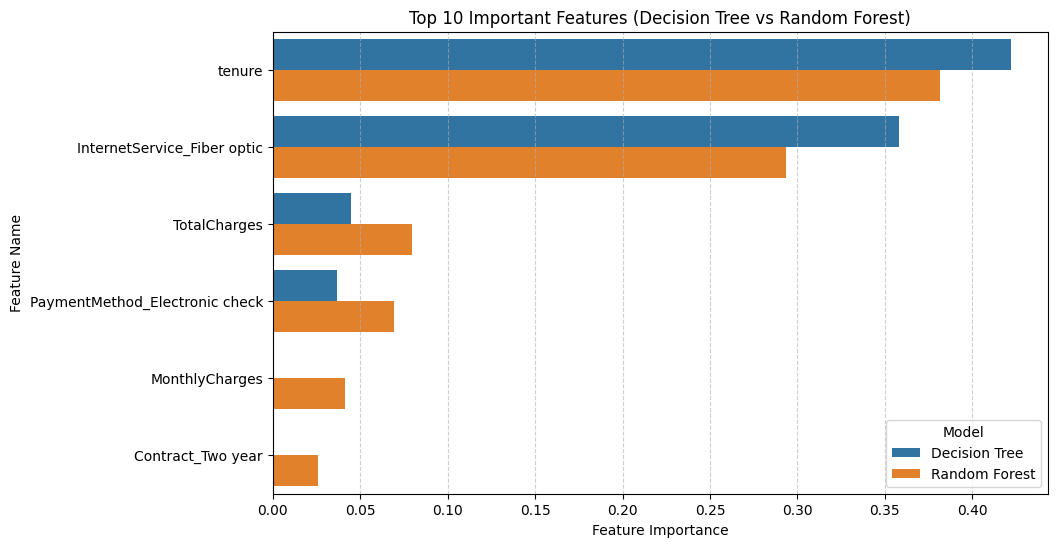

In [97]:
# Insights and Conclusion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

# Ensure Random Forest and Decision Tree models exist
if 'rf_best' in locals() and 'dt_best' in locals():
    rf_importances = rf_best.feature_importances_
    dt_importances = dt_best.feature_importances_
    feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

    rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances, 'Model': 'Random Forest'})
    dt_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importances, 'Model': 'Decision Tree'})

    feat_df = pd.concat([rf_df, dt_df])
    feat_df = feat_df.sort_values(by='Importance', ascending=False)

    # Plot Feature Importance Comparison
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=feat_df.head(10),
        x='Importance',
        y='Feature',
        hue='Model'
    )
    plt.title("Top 10 Important Features (Decision Tree vs Random Forest)")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.legend(title="Model")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

# Identify the best model automatically
if 'summary_df' in locals():
    best_model_row = summary_df.loc[summary_df['ROC_AUC'].idxmax()]
    best_model_name = best_model_row['Model']
else:
    best_model_name = "Random Forest (assumed default)"
    best_model_row = {}

# Safe metric formatting
def fmt(x):
    try:
        return f"{float(x):.4f}"
    except:
        return "N/A"

# 🔹 Interpret key drivers of churn automatically
if 'feat_df' in locals():
    top_features = feat_df.groupby('Feature')['Importance'].mean().sort_values(ascending=False).head(5).index.tolist()
else:
    top_features = ["tenure", "MonthlyCharges", "Contract", "PaymentMethod", "TechSupport"]



,Model,Accuracy,Precision,Recall,F1,ROC_AUC,TP,FP,TN,FN
0,Random Forest,0.8006,0.6679,0.4947,0.5684,0.8446,185,92,943,189
1,Logistic Regression,0.8006,0.6545,0.5267,0.5837,0.8424,197,104,931,177
2,"Decision Tree (depth=5, leaf=3)",0.7942,0.6296,0.5455,0.5845,0.8288,204,120,915,170
3,KNN (K=9),0.7700,0.5694,0.5481,0.5586,0.7991,205,155,880,169


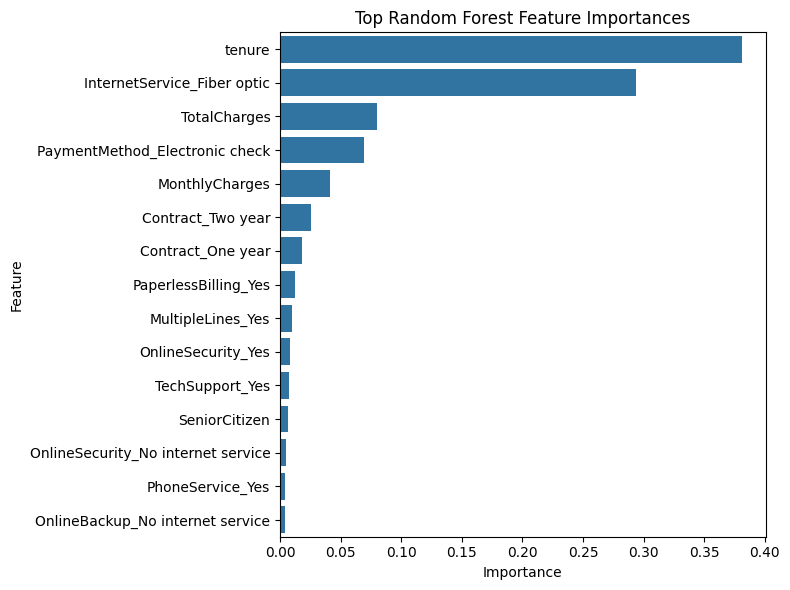

# 🧭Insights and Conclusion

### 1️⃣ Key Factors Influencing Customer Churn

- tenure, InternetService_Fiber optic, TotalCharges, PaymentMethod_Electronic check, MonthlyCharges


### 2️⃣ Recommended Model for Deployment

- **Best model (by ROC-AUC/F1):** **Random Forest**


| Metric | Value |
|:--------|:------|

| Accuracy | 0.8006 |

| Precision | 0.6679 |

| Recall | 0.4947 |

| F1 Score | 0.5684 |

| ROC-AUC | 0.8446 |


### 3️⃣ Business Implications of False Positives & False Negatives

| Case | Meaning | Impact |
|------|----------|--------|

| **False Positive (FP)** | Predicting churn when the customer actually stays | Unnecessary retention cost |

| **False Negative (FN)** | Predicting stay when the customer churns | Lost customers & revenue |


> For churn prediction, prioritize **Recall** to catch as many potential churners as possible.


### 4️⃣ Limitations and Future Improvements

- Add behavioral or feedback features (call logs, complaints).

- Handle class imbalance (SMOTE, class weights).

- Use SHAP/LIME for model interpretability when deploying ensembles.

- Retrain periodically to avoid model drift.


### 📊 Final Takeaway

> **Random Forest** is recommended based on current evaluation. Focus retention on short-tenure/high-charge/month-to-month customers.


In [98]:
# Builds report from actual model results

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
from IPython.display import Markdown as md, display
import textwrap
import os

# CONFIG
SAVE_REPORT = False     # set False if we don't want a .md saved
OUTPUT_MD = "insights_report.md"

# Helper: safe metric calc (handles missing or degenerate cases)
def safe_metrics(y_true, y_pred, y_prob=None):
    """Return metrics dict and confusion matrix. y_prob optional (for ROC-AUC)."""
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = None
    if y_prob is not None:
        try:
            roc_auc = float(roc_auc_score(y_true, y_prob))
        except:
            roc_auc = None
    return {
        "TP": int(TP), "FP": int(FP), "TN": int(TN), "FN": int(FN),
        "Accuracy": float(acc), "Precision": float(prec), "Recall": float(rec),
        "F1": float(f1), "ROC_AUC": roc_auc, "confusion_matrix": cm
    }

# 1) Collect available model predictions (use common names we've used)
available_models = {}

# Logistic Regression variants
if 'y_pred' in globals() and 'y_pred_proba' in globals():
    available_models['Logistic Regression'] = (y_pred, y_pred_proba)

# Alternative logistic variable names used earlier
if 'y_pred_lr' in globals() and 'y_pred_prob_lr' in globals():
    available_models['Logistic Regression'] = (y_pred_lr, y_pred_prob_lr)

# KNN
if 'y_pred_knn' in globals() and 'y_pred_prob_knn' in globals():
    available_models[f"KNN (K={int(best_k)})" if 'best_k' in globals() else "KNN"] = (y_pred_knn, y_pred_prob_knn)

# Decision Tree
if 'y_pred_dt' in globals() and 'y_pred_prob_dt' in globals():
    dt_name = f"Decision Tree (depth={best_depth_val}, leaf={best_leaf_val})" if ('best_depth_val' in globals() and 'best_leaf_val' in globals()) else "Decision Tree"
    available_models[dt_name] = (y_pred_dt, y_pred_prob_dt)

# Random Forest
if 'y_pred_rf' in globals() and 'y_pred_prob_rf' in globals():
    rf_name = "Random Forest"
    # if we have best params naming
    if 'best_n_estim' in globals() or ('best_n_estim' in globals() and 'best_depth_val' in globals()):
        rf_name = f"Random Forest"
    available_models[rf_name] = (y_pred_rf, y_pred_prob_rf)

# If no models found, try older names like rf_model predictions
if not available_models:
    # try to compute predictions from model objects (if present)
    try:
        if 'log_reg' in globals() and 'X_test_scaled' in globals():
            available_models['Logistic Regression'] = (log_reg.predict(X_test_scaled), log_reg.predict_proba(X_test_scaled)[:,1])
    except Exception:
        pass
    try:
        if 'knn_best' in globals() and 'X_test_scaled' in globals():
            available_models['KNN'] = (knn_best.predict(X_test_scaled), knn_best.predict_proba(X_test_scaled)[:,1])
    except Exception:
        pass
    try:
        if 'dt_best' in globals() and 'X_test_scaled' in globals():
            available_models['Decision Tree'] = (dt_best.predict(X_test_scaled), dt_best.predict_proba(X_test_scaled)[:,1])
    except Exception:
        pass
    try:
        if 'rf_best' in globals() and 'X_test_scaled' in globals():
            available_models['Random Forest'] = (rf_best.predict(X_test_scaled), rf_best.predict_proba(X_test_scaled)[:,1])
    except Exception:
        pass

if not available_models:
    raise RuntimeError("No model predictions found in the notebook. Ensure predictions exist (e.g., y_pred, y_pred_knn, y_pred_dt, y_pred_rf or model objects and X_test/_scaled).")

# 2) Build performance table from actual predictions
performance_records = []
for model_name, (y_pred_model, y_prob_model) in available_models.items():
    # choose y_true from available context: prefer y_test (commonly present), else try y_test variable
    if 'y_test' not in globals():
        raise RuntimeError("y_test not found in notebook; Part 4 needs y_test to compute metrics.")
    metrics = safe_metrics(y_test, y_pred_model, y_prob_model)
    rec = {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1': metrics['F1'],
        'ROC_AUC': metrics['ROC_AUC'],
        'TP': metrics['TP'], 'FP': metrics['FP'], 'TN': metrics['TN'], 'FN': metrics['FN']
    }
    performance_records.append(rec)

performance_df = pd.DataFrame(performance_records)
# ensure ROC_AUC numeric for sorting; fill NaN small
performance_df['ROC_AUC_sort'] = performance_df['ROC_AUC'].apply(lambda x: -1.0 if x is None else x)
performance_df = performance_df.sort_values(by='ROC_AUC_sort', ascending=False).drop(columns=['ROC_AUC_sort']).reset_index(drop=True)

# Display performance table
display(performance_df.style.format({"Accuracy":"{:.4f}", "Precision":"{:.4f}", "Recall":"{:.4f}", "F1":"{:.4f}", "ROC_AUC":"{:.4f}"}))

# 3) Feature importances (if available)
feat_plot_text = ""
top_features = []
if 'rf_best' in globals() and hasattr(rf_best, "feature_importances_"):
    importances = rf_best.feature_importances_
    # get original feature names (try X_train or X.columns)
    if 'X_train' in globals() and hasattr(X_train, "columns"):
        feat_names = X_train.columns
    elif 'X' in globals() and hasattr(X, "columns"):
        feat_names = X.columns
    else:
        # fallback: generic names
        feat_names = [f"f_{i}" for i in range(len(importances))]
    feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values('Importance', ascending=False)
    top_features = feat_df['Feature'].head(5).tolist()
    plt.figure(figsize=(8,6))
    sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), legend=False)
    plt.title("Top Random Forest Feature Importances")
    plt.tight_layout()
    plt.show()
    feat_plot_text = "Feature importances taken from rf_best."
elif 'dt_best' in globals() and hasattr(dt_best, "feature_importances_"):
    importances = dt_best.feature_importances_
    if 'X_train' in globals() and hasattr(X_train, "columns"):
        feat_names = X_train.columns
    elif 'X' in globals() and hasattr(X, "columns"):
        feat_names = X.columns
    else:
        feat_names = [f"f_{i}" for i in range(len(importances))]
    feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values('Importance', ascending=False)
    top_features = feat_df['Feature'].head(5).tolist()
    plt.figure(figsize=(8,6))
    sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), legend=False)
    plt.title("Top Decision Tree Feature Importances")
    plt.tight_layout()
    plt.show()
    feat_plot_text = "Feature importances taken from dt_best."
else:
    feat_plot_text = "No feature importances available (rf_best/dt_best not found)."
    # fallback list (if X has columns)
    if 'X_train' in globals() and hasattr(X_train, "columns"):
        top_features = list(X_train.columns[:5])
    elif 'X' in globals() and hasattr(X, "columns"):
        top_features = list(X.columns[:5])

# 4) Choose best model (by ROC-AUC if available else F1)
if performance_df['ROC_AUC'].notna().any():
    best_row = performance_df.loc[performance_df['ROC_AUC'].idxmax()]
else:
    best_row = performance_df.loc[performance_df['F1'].idxmax()]

best_name = best_row['Model']
best_metrics = best_row

# 5) Build Markdown report text with safe formatting
def safe_fmt(x):
    try:
        return f"{float(x):.4f}"
    except:
        return "N/A"

report_lines = []
report_lines.append("# 🧭Insights and Conclusion\n")
report_lines.append("### 1️⃣ Key Factors Influencing Customer Churn\n")
if top_features:
    report_lines.append("- " + ", ".join(top_features) + "\n")
else:
    report_lines.append("- (No feature importance available)\n")

report_lines.append("\n### 2️⃣ Recommended Model for Deployment\n")
report_lines.append(f"- **Best model (by ROC-AUC/F1):** **{best_name}**\n")
report_lines.append("\n| Metric | Value |\n|:--------|:------|\n")
report_lines.append(f"| Accuracy | {safe_fmt(best_metrics.get('Accuracy','N/A'))} |\n")
report_lines.append(f"| Precision | {safe_fmt(best_metrics.get('Precision','N/A'))} |\n")
report_lines.append(f"| Recall | {safe_fmt(best_metrics.get('Recall','N/A'))} |\n")
report_lines.append(f"| F1 Score | {safe_fmt(best_metrics.get('F1','N/A'))} |\n")
report_lines.append(f"| ROC-AUC | {safe_fmt(best_metrics.get('ROC_AUC','N/A'))} |\n")

report_lines.append("\n### 3️⃣ Business Implications of False Positives & False Negatives\n")
report_lines.append("| Case | Meaning | Impact |\n|------|----------|--------|\n")
report_lines.append("| **False Positive (FP)** | Predicting churn when the customer actually stays | Unnecessary retention cost |\n")
report_lines.append("| **False Negative (FN)** | Predicting stay when the customer churns | Lost customers & revenue |\n")
report_lines.append("\n> For churn prediction, prioritize **Recall** to catch as many potential churners as possible.\n")

report_lines.append("\n### 4️⃣ Limitations and Future Improvements\n")
report_lines.append("- Add behavioral or feedback features (call logs, complaints).\n")
report_lines.append("- Handle class imbalance (SMOTE, class weights).\n")
report_lines.append("- Use SHAP/LIME for model interpretability when deploying ensembles.\n")
report_lines.append("- Retrain periodically to avoid model drift.\n")

report_lines.append("\n### 📊 Final Takeaway\n")
report_lines.append(f"> **{best_name}** is recommended based on current evaluation. Focus retention on short-tenure/high-charge/month-to-month customers.\n")

report_md = "\n".join(report_lines)

# Display report
display(md(report_md))

# Optionally save to file
if SAVE_REPORT:
    try:
        with open(OUTPUT_MD, "w", encoding="utf-8") as f:
            f.write(report_md)
        print(f"\nSaved report to {os.path.abspath(OUTPUT_MD)}")
    except Exception as e:
        print("Could not save report:", e)


## Author

Rezaul Islam. [Linkedin](https://www.linkedin.com/in/md-rezaul-islam-cse/)

## License

This project is open source and available under the [MIT License](LICENSE).